<p align="center"><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="260" height="110" /></p>

---
Project Submitted by: Sachin Varshney <br>
Email ID: varshney.sachin@gmail.com <br>
Cohort: August 2020 <br>
Term: Term 3 <br>
Domain: Retail : Online Sales Data Prediction using Machine Learning



---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Importing Libraries**](#Section3)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
7. [**Data Post-Profiling**](#Section7)<br>
8. [**Exploratory Data Analysis**](#Section8)<br>
  8.1. [**Correlation**](#Section81) <br>
9. [**Getting Data Ready for ML**](#Section9) <br>
  9.1 [**Dividing data into X and y**](#Section91) <br>
  9.2 [**Seperating categorical and numerical independent features**](#Section92) <br>
  9.3 [**Normalization of Data**](#Section93) <br>
  9.4 [**Label Encoding of Categorical Data**](#Section94) <br>
  9.5 [**Spliting data into train and test data**](#Section95) <br>
10. [**Machine learning Execution**](#Section10) <br>
  10.1 [**Linear Regression**](#Section101) <br>
  10.2 [**Decision Tree Regression**](#Section102) <br>
  10.3 [**Random Forest Regression**](#Section103) <br>
  10.4 [**Random Forest Regression using RandomSearchCV**](#Section104) <br>
11. [**Conclusion**](#Section11) <br>
  11.1 [**Comparison between all alogrorithms**](#Section111) <br>
  
  
 




---
<a name = Section1></a>
# **1. Introduction**
---

- This project is to do sales prediction of  Online Sales Data.

- The orders contains different types of categories (Office Supplies,Furniture,Technology) based on product type.

- This Company is service provider of products for daily needs .

- This dataset also contains sales data for the online transaction using their website.

<p align="center"><img src="https://github.com/sachinvarshney2609/EDA-Project/blob/main/onlinestore.png?raw=true?"></p>

---
<a name = Section2></a>
# **2. Problem Statement**
---

- Here we are going to analyze and conclude few observations for following Problem Statement.
- **Problem Statement:**

  - With the data provided , we will predict the sales using Machine learning  algorithms
  
  - We will compare accuracy of different algorithms and conclude which one is providing best predictions


  
  
<p align="center"><img src="https://github.com/sachinvarshney2609/EDA-Project/blob/main/How-to-Set-Sales-Goals-in-7-Steps.png?raw=true"></p>

- Following points are in scope of this study.

- **Scope of Study:**

  - Only 10292 odd products and 1590 customers are included in study.

  - The data is from 1st,Jan 2011 to 31st Dec 2014 . 

  - Regions in scope: Africa, Oceania, EMEA, North, Central Asia, West, North Asia, Central, South, Canada, Southeast Asia,
    East, Caribbean.

---
<a id = Section3></a>
# **3. Importing Libraries**
---

- Importing all necessary libraries which are needed for Sales prediction using  Machine learning algorithms on this Retail Sales Data .

### **Installing Libraries**

In [5]:
!pip install -q pandas-profiling

### **Importing Libraries**

- You can headstart with the basic libraries as imported inside the cell below.

- If you want to import some additional libraries, feel free to do so.


In [6]:
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
%matplotlib inline
import seaborn as sns                                               # Importing seaborn library for interactive visualization
#----------------------------------------------------------------------------------------------------------------------
import warnings                                                     # To get rid of all warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)                           # Display all dataframe columns in outputs (it has 27 columns, which is wider than the notebook)
                                                                    # This sets it up to dispaly with a horizontal scroll instead of hiding the middle columns
#----------------------------------------------------------------------------------------------------------------------
#-------------- Importing Machine Learning, Normalization and Standardization Libraries -------------------------------
#----------------------------------------------------------------------------------------------------------------------#-------------------------------------------------------------------------------------------------------------------------------   
from sklearn.linear_model import LinearRegression                   # Importing linear regression algoritm from Sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler                    # Importing Standard Scalar from Sklearn to do standarisation of data
from sklearn.preprocessing import LabelEncoder                      # Importing label Encoder from Sklearn to do encoding of categorical data
from sklearn import tree                                            # Decision Tree Algorithm

#----------------------------------------------------------------------------------------------------------------------
from sklearn import metrics                                         # Calculate MAE and RMSE
from sklearn.metrics import accuracy_score                          # Accuracy Score
from sklearn.metrics import r2_score                                # R2 for regression problem

#----------------------------------------------------------------------------------------------------------------------



---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- This section is emphasised on the accquiring the data and obtain some descriptive information out of it.


### **Data Acquisition**

In [7]:
df_online=pd.read_csv('https://raw.githubusercontent.com/sachinvarshney2609/INSAID/master/superstore_dataset.csv',encoding = "ISO-8859-1")
#pd.read_csv("../input/superstore_dataset2011-2015.csv", encoding = "ISO-8859-1")
df_online_backup=df_online.copy()
print('Data Shape:', df_online.shape)
df_online.head()

Data Shape: (51290, 24)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,01-01-2011,06-01-2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,01-01-2011,05-01-2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,01-01-2011,05-01-2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


### **Data Information**
---

- This section is emphasised on the accquiring the data and obtain some descriptive information out of it.
- You could either scrap the data and then continue, or use a direct source of link (generally preferred in most cases).
- You will be working with a direct source of link to head start your work without worrying about anything.
- Before going further you must have a good idea about the features of the data set:


|Id|Feature|Description|
|:--|:--|:--|
|01| Order ID        | A Unique code for the order .|
|02| Order Date      | Date on which order is placed.|
|03| Ship Date       | Date on which order is shipped.|
|04| Ship Mode       | Categorial coulmn for each shipping methods : Standard Class, Second Class, First Class,Same Day| 
|05| Customer ID     | A unique customer id 
|06| Customer Name   |Customer first and last name | 
|07| Segment         | Customer segment : Consumer,Home Office, Corporate.|
|08| City            | From which city order is placed .|
|09| State           | From which state order is placed .| 
|10| Country         | From which country  order is placed .|
|11| Postal Code     | Postal code of customer residence |
|12| Market          | Region : Africa', 'APAC', 'EMEA', 'EU', 'US', 'LATAM', 'Canada| 
|13| Region          | From which regions order is placed .|
|14| Product ID      | A unique code for the product.|
|15| Category        | A categorical column to explain category of the product :Office Supplies, Furniture, Technolog |
|16| Sub-Category    | A categorical column to  explain subcategory of the product : Storage, Supplies, 'Paper' etc |
|17| Product Name    | Product details |
|18| Sales           | The amount of sales for an order.| 
|19| Quantity        | No of units per order .|
|20|  Discount       | The amount of discount given for an order .|
|21| Profit          | The amount of profit per order .| 
|22| Shipping Cost   | The amount of shipping cost incurred per order | 
|23| Order Priority  | A cateegorial column to explain priority of an order : Medium', 'High', 'Critical', 'Low' |

Total 51290 rows and 24 columns will be analyzed in this study.

In [8]:
df_online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [9]:
df_online['Product ID'].nunique()

10292

Study will be conducted on orderes placed for 10292 unique product codes.

In [10]:
df_online.describe().round(2)

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00,9994.00,51290.00,51290.00,51290.00,51290.00,51290.00
mean,25645.50,55190.38,246.49,3.48,0.14,28.61,26.38
std,14806.29,32063.69,487.57,2.28,0.21,174.34,57.30
min,1.00,1040.00,0.44,1.00,0.00,-6599.98,0.00
25%,12823.25,23223.00,30.76,2.00,0.00,0.00,2.61
50%,25645.50,56430.50,85.05,3.00,0.00,9.24,7.79
75%,38467.75,90008.00,251.05,5.00,0.20,36.81,24.45
max,51290.00,99301.00,22638.48,14.00,0.85,8399.98,933.57


---
<a name = Section5></a>
# **5. Data Pre-Profiling**
---

- This section is emphasised on getting a report about the data.

- You need to perform pandas profiling and get some observations out of it...

In [11]:
df_online.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

There are 41296 null entries for Postal Code.<br>


In [12]:
df_online[df_online['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,01-01-2011,06-01-2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,01-01-2011,05-01-2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,01-01-2011,05-01-2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51283,27700,IN-2014-23754,31-12-2014,07-01-2015,Standard Class,KM-16225,Kalyca Meade,Corporate,Shantou,Guangdong,China,NaN,APAC,North Asia,OFF-PA-10004727,Office Supplies,Paper,"Eaton Note Cards, 8.5 x 11",79.470,3,0.0,25.380,1.41,Medium
51284,2143,MX-2014-108574,31-12-2014,04-01-2015,Standard Class,JB-16045,Julia Barnett,Home Office,Reynosa,Tamaulipas,Mexico,NaN,LATAM,North,OFF-LA-10004969,Office Supplies,Labels,"Novimex Legal Exhibit Labels, Adjustable",16.740,3,0.0,0.660,1.32,Medium
51286,47594,MO-2014-2560,31-12-2014,05-01-2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,Morocco,NaN,Africa,Africa,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.420,0.49,Medium
51287,8857,MX-2014-110527,31-12-2014,02-01-2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,Nicaragua,NaN,LATAM,Central,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.360,0.35,Medium


In [13]:
#Check for duplicates, df_online is backuped to df_online_backup first, it still contains 51290 rows × 24 columns so means there are no duplicates

df_online_backup.drop_duplicates()  

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,01-01-2011,06-01-2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,22253,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,48883,HU-2011-1220,01-01-2011,05-01-2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,11731,IT-2011-3647632,01-01-2011,05-01-2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,22255,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,31-12-2014,04-01-2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,United States,94533.0,US,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,31-12-2014,05-01-2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,Morocco,NaN,Africa,Africa,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,31-12-2014,02-01-2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,Nicaragua,NaN,LATAM,Central,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,31-12-2014,06-01-2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,Mexico,NaN,LATAM,North,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium


Dataset still  contains 51290 rows × 24 columns so means there are no duplicates, though there are duplicate Order_ID but they are for different categories.

### Observations:
- As postal code is not significant and contains more than 85% null values , so it can be dropped.
- Order date and ship date are in object , they need to be converted to datetime format .


In [14]:
profile = ProfileReport(df_online)
profile.to_file("Pre-Profiling Online orders Output.html")

Summarize dataset:   0%|          | 0/38 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

---
<a name = Section6></a>
# **6. Data Pre-Processing**
---

- This section is emphasised on performing data manipulation over unstructured data for further processing and analysis.

- To modify unstructured data to strucuted data you need to verify and manipulate the integrity of the data by:
  - Handling missing data,

  - Handling redundant data,

  - Handling inconsistent data,

  - Handling outliers,

  - Handling typos
  
  - Dropping features which may lead to overfitting

Check for Null values

In [15]:
df_online.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

Removing Missing/NaN Data from dataset

In [16]:
df_online[df_online['Postal Code'].isnull()].head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,01-01-2011,06-01-2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,01-01-2011,05-01-2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,01-01-2011,05-01-2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


 Postal code is not significant and contains more than 85% null values , so it can be dropped.

In [17]:
df_online.drop(['Postal Code'],axis= 1,inplace=True)

Dropping below columns as they may result in overfitting of the model:

Row id <br>
order id <br>
Order Date <br>
Ship Date <br>
Ship Mode <br>
Customer id <br>
City <br>
Country <br>
State <br>
Postal Code <br>
Market <br>
Sub category <br>
Product name

In [18]:
df_online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Market          51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Product ID      51290 non-null  object 
 14  Category        51290 non-null  object 
 15  Sub-Category    51290 non-null  object 
 16  Product Name    51290 non-null  object 
 17  Sales           51290 non-null 

In [19]:
df_online_new=df_online.drop(['Row ID','Order ID','Order Date','Ship Date','Ship Mode','Customer ID','Customer Name','City','State','Country','Market','Sub-Category','Product Name'],axis=1)

In [20]:
df_online_new.head()

,Segment,Region,Product ID,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,Consumer,Africa,OFF-TEN-10000025,Office Supplies,408.300,2,0.0,106.140,35.46,Medium
1,Consumer,Oceania,OFF-SU-10000618,Office Supplies,120.366,3,0.1,36.036,9.72,Medium
2,Consumer,EMEA,OFF-TEN-10001585,Office Supplies,66.120,4,0.0,29.640,8.17,High
3,Home Office,North,OFF-PA-10001492,Office Supplies,44.865,3,0.5,-26.055,4.82,High
4,Consumer,Oceania,FUR-FU-10003447,Furniture,113.670,5,0.1,37.770,4.70,Medium


---
<a name = Section7></a>
# **7. Data Post-Profiling**
---

- This section is emphasised on getting a report about the data after the data manipulation.

- You may end up observing some new changes, so keep it under check and make right observations.

In [21]:
profile = ProfileReport(df_online_new)
profile.to_file("Post-Profiling Online orders Output.html")

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

---
<a name = Section8></a>
# **8. Exploratory Data Analysis**
---

- This section is emphasised on asking the right questions and perform analysis using the data.

- Note that there is no limit how deep you can go, but make sure not to get distracted from right track.

<a name = Section81></a>
### 8.1. Correlation.

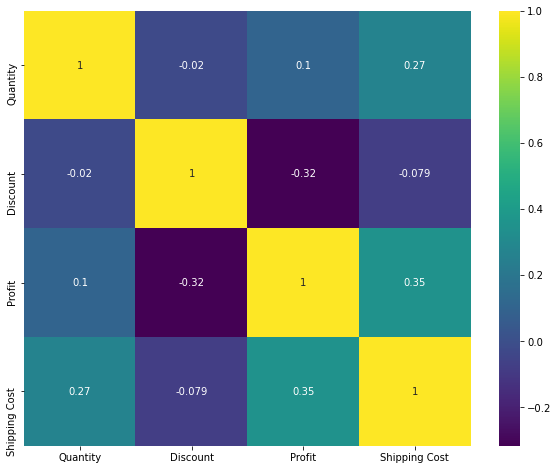

In [22]:
df_online_minus_sales = df_online_new.drop(['Sales'] ,axis =1)
retail_corr = df_online_minus_sales.corr()
plt.figure(figsize=(10,8))
sns.heatmap(retail_corr, annot=True, cmap='viridis')
plt.savefig('HeatMap.png')
plt.show()

The above graph shows there is no multicolinearity between the independent features.


Text(0.5, 0, 'Sales')

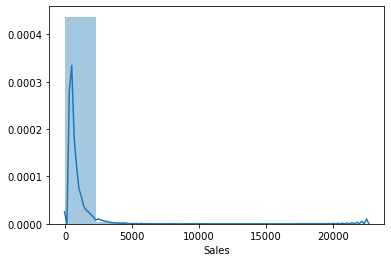

In [23]:
sns.distplot(df_online_new['Sales'], bins=10)
plt.xlabel('Sales')

The above graph shows sales is positively Skewed

---
<a name = Section9></a>

# 9. Getting Data Ready for ML 
---

- This section emphasised on divding data into Independent Varaible(X) and      dependent varaible (y).
- This section will emphasis on seperating categorical and numerical     independent features
- This section will emphasis on doing normalization of Continous varibales and encoding of categorical features.
- This section is emphasised on splitting the data into test and training.



<a name = Section91></a>
### 9.1 Dividing data into X (Independent variables ) and y (Dependent               Variable)

In [24]:
y = df_online_new['Sales']
y.head()

0    408.300
1    120.366
2     66.120
3     44.865
4    113.670
Name: Sales, dtype: float64

In [25]:
X = df_online_new.drop(['Sales'], axis = 1)
X.head()

,Segment,Region,Product ID,Category,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,Consumer,Africa,OFF-TEN-10000025,Office Supplies,2,0.0,106.140,35.46,Medium
1,Consumer,Oceania,OFF-SU-10000618,Office Supplies,3,0.1,36.036,9.72,Medium
2,Consumer,EMEA,OFF-TEN-10001585,Office Supplies,4,0.0,29.640,8.17,High
3,Home Office,North,OFF-PA-10001492,Office Supplies,3,0.5,-26.055,4.82,High
4,Consumer,Oceania,FUR-FU-10003447,Furniture,5,0.1,37.770,4.70,Medium


<a name = Section92></a>
### 9.2 Seperating categorical and numerical independent features

In [26]:
Numerical_features = X.describe().columns
Numerical_features

Index(['Quantity', 'Discount', 'Profit', 'Shipping Cost'], dtype='object')

In [27]:
Categorical_features = list(set(X.columns)-set(X.describe().columns))
Categorical_features

['Category', 'Region', 'Product ID', 'Segment', 'Order Priority']

<a name = Section93></a>
### 9.3 Normalization of Data

In [28]:
from sklearn.preprocessing import StandardScaler 
ss =StandardScaler()

In [29]:
X[Numerical_features] =ss.fit_transform(X[Numerical_features])

In [30]:
X[Numerical_features]

,Quantity,Discount,Profit,Shipping Cost
0,-0.647964,-0.673210,0.444702,0.158546
1,-0.209126,-0.202129,0.042589,-0.290698
2,0.229712,-0.673210,0.005902,-0.317751
3,-0.209126,1.682194,-0.313561,-0.376219
4,0.668550,-0.202129,0.052536,-0.378313
...,...,...,...,...
51285,-0.647964,0.268952,-0.138191,-0.444810
51286,-1.086803,-0.673210,-0.161702,-0.451791
51287,-0.209126,-0.673210,-0.093215,-0.454234
51288,-1.086803,-0.673210,-0.160899,-0.456852


<a name = Section94></a>
### 9.4 Label Encoding of Categorical Data

In [31]:
#from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in Categorical_features:
   X[column] =le.fit_transform(X[column])
X.head()


,Segment,Region,Product ID,Category,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,0,0,7846,1,-0.647964,-0.673210,0.444702,0.158546,3
1,0,9,7464,1,-0.209126,-0.202129,0.042589,-0.290698,3
2,0,5,7858,1,0.229712,-0.673210,0.005902,-0.317751,1
3,2,7,6206,1,-0.209126,1.682194,-0.313561,-0.376219,1
4,0,9,1492,0,0.668550,-0.202129,0.052536,-0.378313,3


In [32]:
print(y.shape)
print(X.shape)

(51290,)
(51290, 9)


<a name = Section95></a>
### 9.5 Spliting data into train and test data

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [34]:
print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)

(41032,)
(41032, 9)
(10258,)
(10258, 9)



<a name = Section10></a>
# 10. Machine learning Execution




- This section is emphasised on using different ML algorithms to predict the sales using the data.
 

<a name = Section101></a>
### 10.1 Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [38]:
y_lin_pred =linreg.predict(X_test)

In [39]:
from sklearn import metrics
MAE_linear = metrics.mean_absolute_error(y_test, y_lin_pred)
print(MAE_linear)
RMSE_linear = np.sqrt(metrics.mean_squared_error(y_test, y_lin_pred))
print(MAE_linear)



121.61461934491068
121.61461934491068


In [40]:
from sklearn.metrics import r2_score
r2_linear = r2_score(y_test, y_lin_pred)
print ("R2 = ", r2_linear)


R2 =  0.6962115613322076


In [41]:
#Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)
adjusted_linreg_r_squared = 1 - (1-r2_linear)*(len(y_lin_pred)-1)/(len(y_lin_pred)-X_test.shape[1]-1)
print(r2_linear, adjusted_linreg_r_squared)

0.6962115613322076 0.6959447682069139


<a name = Section102></a>
### 10.2 Decison Tree Regression

In [42]:
from sklearn import tree
decreg = tree.DecisionTreeRegressor(random_state = 0)
decreg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [43]:
y_decreg_pred=decreg.predict(X_test)
print(y_decreg_pred)

[ 18.54    713.29056 131.2     ...  33.21     11.76    465.18   ]


In [44]:
from sklearn import metrics
MAE_decreg = metrics.mean_absolute_error(y_test, y_decreg_pred)
print(MAE_decreg)
RMSE_decreg = np.sqrt(metrics.mean_squared_error(y_test, y_decreg_pred))
print(RMSE_decreg)

89.47839074283486
323.55548589989286


In [45]:
from sklearn.metrics import r2_score
r2_decreg = r2_score(y_test, y_decreg_pred)
print ("R2 = ", r2_decreg)

R2 =  0.6031478732771651


In [46]:
#Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)
adjusted_decreg_r_squared = 1 - (1-r2_decreg)*(len(y_decreg_pred)-1)/(len(y_decreg_pred)-X_test.shape[1]-1)
print(r2_decreg, adjusted_decreg_r_squared)


0.6031478732771651 0.6027993497466708


Linear regression is performing better than Decision tree as R2 and Adjusted R2 increased, so we need to perform hypertuning. 

<a name = Section103></a>
### 10.3 Random Tree Regression

In [47]:
from sklearn.ensemble import RandomForestRegressor

randreg = RandomForestRegressor(random_state = 0)

randreg.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [48]:
y_randreg_pred = randreg.predict(X_test)

In [49]:
from sklearn import metrics
MAE_randreg = metrics.mean_absolute_error(y_test, y_randreg_pred)
print(MAE_randreg)
RMSE_randreg = np.sqrt(metrics.mean_squared_error(y_test, y_randreg_pred))
print(RMSE_randreg)

65.7407194812439
213.29393601803693


In [50]:
from sklearn.metrics import r2_score
r2_randreg = r2_score(y_test, y_randreg_pred)
print ("R2 = ", r2_randreg)

R2 =  0.8275400746679031


In [51]:
#Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)
adjusted_randreg_r_squared = 1 - (1-r2_randreg)*(len(y_randreg_pred)-1)/(len(y_randreg_pred)-X_test.shape[1]-1)
print(r2_randreg, adjusted_randreg_r_squared)

0.8275400746679031 0.8273886168880448


<a name = Section104></a>
### 10.4 Random Tree Regression Hypertuning using Randomized Search CV

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
# parameters for RandomSearchCV
# specify parameters and distributions to sample from
param_dist = {"max_depth": range(2,10),
              "min_samples_split" : [2, 5, 10, 15, 100],
              "min_samples_leaf" : [1, 2, 5, 10],
              "criterion" : ["mse", "mae"],
              'max_features': ['sqrt', 'log2']
             }
# run randomized search
n_iter_search = 10
random_search = RandomizedSearchCV(decreg, param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs = -1)

In [53]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeRegressor(random_state=0), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': range(2, 10),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100]})

In [54]:
y_random_search_pred = random_search.predict(X_test)

In [55]:
from sklearn import metrics
MAE_random_search_decreg = metrics.mean_absolute_error(y_test,y_random_search_pred)
print(MAE_random_search_decreg)
RMSE_random_search_decreg = np.sqrt(metrics.mean_squared_error(y_test, y_random_search_pred))
print(RMSE_random_search_decreg)

  
      
      

84.03316700492523
218.74550312152937


In [56]:
from sklearn.metrics import r2_score
r2_random_decreg = r2_score(y_test, y_random_search_pred)
print ("R2 after Random search  = ", r2_random_decreg)

print ("R2 before Randon Search = ", r2_decreg)

R2 after Random search  =  0.8186116275143807
R2 before Randon Search =  0.6031478732771651


In [57]:
#Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)
adjusted_random_decreg_r_squared = 1 - (1-r2_random_decreg)*(len(y_random_search_pred)-1)/(len(y_random_search_pred)-X_test.shape[1]-1)
print(r2_random_decreg, adjusted_random_decreg_r_squared)

0.8186116275143807 0.8184523285924085


<a name = Section11></a>
# 11. Conclusion

<a name = Section111></a>
### 11.1 Comparision between all algorithms

In [70]:
Regression_Score = []
Score_Heading = ['Algorithm','Mean Absolute Error','RMSE','R-Squared','Adjusted R-Squared']

In [71]:
Regression_Score.append(['Linear Regression', MAE_linear, RMSE_linear, r2_linear,adjusted_linreg_r_squared])
Regression_Score.append(['Decision Tree Regression', MAE_decreg, RMSE_decreg, r2_decreg,adjusted_decreg_r_squared])
Regression_Score.append(['Random Forest  Regression', MAE_randreg, RMSE_randreg, r2_randreg,adjusted_randreg_r_squared])
Regression_Score.append(['Randon Forest Regression (Randomised Search CV)', MAE_random_search_decreg, RMSE_random_search_decreg,r2_random_decreg,adjusted_random_decreg_r_squared])

In [72]:
Final_comparision = pd.DataFrame( data =Regression_Score,columns=Score_Heading)

In [73]:
Final_comparision = Final_comparision.set_index('Algorithm')
Final_comparision 

,Mean Absolute Error,RMSE,R-Squared,Adjusted R-Squared
Algorithm,,,,
Linear Regression,121.614619,283.087069,0.696212,0.695945
Decision Tree Regression,89.478391,323.555486,0.603148,0.602799
Random Forest Regression,65.740719,213.293936,0.827540,0.827389
Randon Forest Regression (Randomised Search CV),84.033167,218.745503,0.818612,0.818452


### It clearly shows Random Forest Regression performing well in predicting online sales for this case study.